In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy as citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=082ccd32fbf466c90e98e887c8b8fd7d


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 32 of Set 23 | artvin
Processing Record 33 of Set 23 | saint george
Processing Record 34 of Set 23 | nouakchott
Processing Record 35 of Set 23 | butaritari
Processing Record 36 of Set 23 | ha tinh
Processing Record 37 of Set 23 | ostrovnoy
Processing Record 38 of Set 23 | busselton
Processing Record 39 of Set 23 | upernavik
Processing Record 40 of Set 23 | barrow
Processing Record 41 of Set 23 | maningrida
Processing Record 42 of Set 23 | porirua
Processing Record 43 of Set 23 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 44 of Set 23 | tuktoyaktuk
Processing Record 45 of Set 23 | rikitea
Processing Record 46 of Set 23 | buraydah
Processing Record 47 of Set 23 | tiznit
Processing Record 48 of Set 23 | hobart
Processing Record 49 of Set 23 | prado
Processing Record 50 of Set 23 | vaini
Processing Record 51 of Set 23 | stoyba
City not found. Skipping...
Processing Record 52 of Set 23 | saint-philippe
Processing Record 53 of Set 23 | kharitonovo
Proc

Processing Record 37 of Set 26 | grimmen
Processing Record 38 of Set 26 | marrakesh
Processing Record 39 of Set 26 | ivanovka
Processing Record 40 of Set 26 | camiri
Processing Record 41 of Set 26 | korla
Processing Record 42 of Set 26 | flinders
Processing Record 43 of Set 26 | guerrero negro
Processing Record 44 of Set 26 | huangzhai
Processing Record 45 of Set 26 | sao joao da barra
Processing Record 46 of Set 26 | belyy yar
Processing Record 47 of Set 26 | nosy varika
Processing Record 48 of Set 26 | leningradskiy
Processing Record 49 of Set 26 | bam
Processing Record 50 of Set 26 | el dorado
Processing Record 1 of Set 27 | wahran
City not found. Skipping...
Processing Record 2 of Set 27 | songling
Processing Record 3 of Set 27 | nemuro
Processing Record 4 of Set 27 | kailua
Processing Record 5 of Set 27 | aykhal
Processing Record 6 of Set 27 | tiksi
Processing Record 7 of Set 27 | halalo
City not found. Skipping...
Processing Record 8 of Set 27 | bluff
Processing Record 9 of Set 2

Processing Record 22 of Set 30 | temaraia
City not found. Skipping...
Processing Record 23 of Set 30 | panzhihua
Processing Record 24 of Set 30 | talakan
Processing Record 25 of Set 30 | mandalgovi
Processing Record 26 of Set 30 | asosa
Processing Record 27 of Set 30 | marmora
Processing Record 28 of Set 30 | ammon
Processing Record 29 of Set 30 | mogadishu
Processing Record 30 of Set 30 | hare bay
Processing Record 31 of Set 30 | la ronge
Processing Record 32 of Set 30 | dalbandin
Processing Record 33 of Set 30 | vardo
Processing Record 34 of Set 30 | pontes e lacerda
Processing Record 35 of Set 30 | morondava
Processing Record 36 of Set 30 | taltal
Processing Record 37 of Set 30 | salym
Processing Record 38 of Set 30 | broken hill
Processing Record 39 of Set 30 | meyungs
City not found. Skipping...
Processing Record 40 of Set 30 | warqla
City not found. Skipping...
Processing Record 41 of Set 30 | atar
Processing Record 42 of Set 30 | alofi
Processing Record 43 of Set 30 | kamenskoye

Processing Record 48 of Set 33 | ko samui
Processing Record 49 of Set 33 | inderborskiy
City not found. Skipping...
Processing Record 50 of Set 33 | sembakung
Processing Record 1 of Set 34 | najran
Processing Record 2 of Set 34 | ambon
Processing Record 3 of Set 34 | makhinjauri
Processing Record 4 of Set 34 | tongzi
Processing Record 5 of Set 34 | aranos
Processing Record 6 of Set 34 | kingman
Processing Record 7 of Set 34 | funadhoo
Processing Record 8 of Set 34 | akyab
Processing Record 9 of Set 34 | lincoln
Processing Record 10 of Set 34 | methoni
Processing Record 11 of Set 34 | khandbari
Processing Record 12 of Set 34 | majene
Processing Record 13 of Set 34 | abeche
Processing Record 14 of Set 34 | adre
Processing Record 15 of Set 34 | dzilam gonzalez
Processing Record 16 of Set 34 | along
Processing Record 17 of Set 34 | natal
Processing Record 18 of Set 34 | asfi
Processing Record 19 of Set 34 | bela
Processing Record 20 of Set 34 | kuching
Processing Record 21 of Set 34 | kunu

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Artvin,41.1667,41.8333,43.88,71,80,6.69,TR,2022-02-08 22:16:18
1,Saint George,37.1041,-113.5841,70.27,17,0,5.75,US,2022-02-08 22:16:19
2,Nouakchott,18.0858,-15.9785,73.33,37,1,10.09,MR,2022-02-08 22:16:19
3,Butaritari,3.0707,172.7902,81.84,77,72,13.91,KI,2022-02-08 22:12:33
4,Ha Tinh,18.3333,105.9000,66.58,93,100,8.16,VN,2022-02-08 22:16:20
5,Ostrovnoy,68.0531,39.5131,13.68,89,49,17.78,RU,2022-02-08 22:16:20
6,Busselton,-33.6500,115.3333,52.05,85,2,6.33,AU,2022-02-08 22:16:20
7,Upernavik,72.7868,-56.1549,-16.94,93,100,5.97,GL,2022-02-08 22:16:21
8,Barrow,71.2906,-156.7887,-29.18,100,0,8.05,US,2022-02-08 22:14:50
9,Maningrida,-12.0667,134.2667,79.11,84,100,2.75,AU,2022-02-08 22:16:22


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Artvin,TR,2022-02-08 22:16:18,41.1667,41.8333,43.88,71,80,6.69
1,Saint George,US,2022-02-08 22:16:19,37.1041,-113.5841,70.27,17,0,5.75
2,Nouakchott,MR,2022-02-08 22:16:19,18.0858,-15.9785,73.33,37,1,10.09
3,Butaritari,KI,2022-02-08 22:12:33,3.0707,172.7902,81.84,77,72,13.91
4,Ha Tinh,VN,2022-02-08 22:16:20,18.3333,105.9000,66.58,93,100,8.16
5,Ostrovnoy,RU,2022-02-08 22:16:20,68.0531,39.5131,13.68,89,49,17.78
6,Busselton,AU,2022-02-08 22:16:20,-33.6500,115.3333,52.05,85,2,6.33
7,Upernavik,GL,2022-02-08 22:16:21,72.7868,-56.1549,-16.94,93,100,5.97
8,Barrow,US,2022-02-08 22:14:50,71.2906,-156.7887,-29.18,100,0,8.05
9,Maningrida,AU,2022-02-08 22:16:22,-12.0667,134.2667,79.11,84,100,2.75


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644376622.4651356

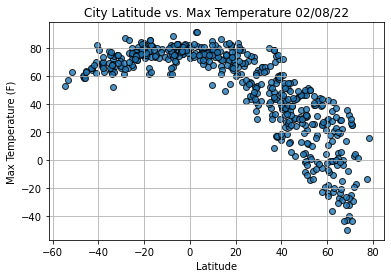

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

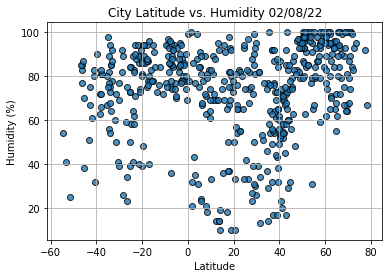

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

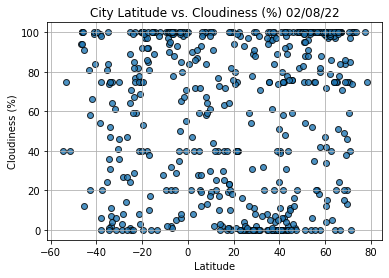

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

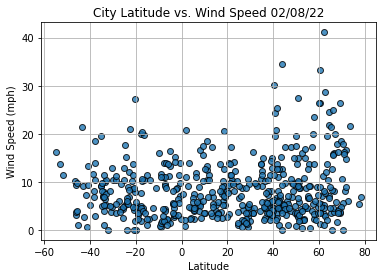

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()